                                            AIM 5001 M9 Assignment
                                Working with HTML, JSON, Web Scraping, and Web APIs
                                            Completed by Zeyu Wang

In [2]:
import urllib.request
import pandas as pd
import requests
import json
import bs4 as bs

# Part I (30 points): Working with HTML and JSON

In [257]:
#use urllib.request to read HTML file and don't use it because their are too many '/t' tag
with urllib.request.urlopen('https://raw.githubusercontent.com/NewThread-ZY/AIM-5001/master/books.html') as f:
    print(f.read())

b'<html>\n  <head>\n    <title>three books information</title>\n\t<p size=\'12\'>Here are three books</p>\n  </head>\n  <body>\n    <div id="three books">\n\t\t<table cellspacing="20">\n\t\t\t<tr>\n\t\t\t\t<th>Python for Data Analysis</th>\n\t\t\t\t<th>Feature Engineering for Machine Learning</th>\n\t\t\t\t<th>Learning PostgreSQL 11 Third Edition</th>\n\t\t\t</tr>\n\t\t\t<tr>\n\t\t\t\t<td>Wes McKinney</td>\n\t\t\t\t<td>Alice Zheng and Amanda Casari</td>\n\t\t\t\t<td>Salahaldin Juba & Andrey Volkov</td>\n\t\t\t</tr>\n\t\t\t<tr>\n\t\t\t\t<td>523pages</td>\n\t\t\t\t<td>201pages</td>\n\t\t\t\t<td>509pages</td>\n\t\t\t</tr>\n\t\t\t<tr>\n\t\t\t\t<td>ISBN: 978-1491957660</td>\n\t\t\t\t<td>ISBN: 978-1491953242</td>\n\t\t\t\t<td>ISBN: 978-1789535464</td>\n\t\t\t</tr>\n\t\t</table>\n\t</div>\n    \n  </body>\n</html>'


In [4]:
data = pd.read_json('https://raw.githubusercontent.com/NewThread-ZY/AIM-5001/master/books.json')
data

,title,authors,number of pages,ISBN
0,Python for Data Analysis,Wes McKinney,523pages,ISBN: 978-1491957660
1,Feature Engineering for Machine Learning,Alice Zheng and Amanda Casar,201pages,ISBN: 978-1491953242
2,Learning PostgreSQL 11 Third Edition,Salahaldin Juba & Andrey Volkov,509pages,ISBN: 978-1789535464


In [258]:
#use request.get to get data from JSON file in Github
r = requests.get('https://raw.githubusercontent.com/NewThread-ZY/AIM-5001/master/books.json')
result = json.loads(r.text)
print(result)

[{'title': 'Python for Data Analysis', 'authors': 'Wes McKinney', 'number of pages': '523pages', 'ISBN': 'ISBN: 978-1491957660'}, {'title': 'Feature Engineering for Machine Learning', 'authors': 'Alice Zheng and Amanda Casar', 'number of pages': '201pages', 'ISBN': 'ISBN: 978-1491953242'}, {'title': 'Learning PostgreSQL 11 Third Edition', 'authors': 'Salahaldin Juba & Andrey Volkov', 'number of pages': '509pages', 'ISBN': 'ISBN: 978-1789535464'}]


In [259]:
#use pandas to directly read the data from HTML
pf_html = pd.read_html('https://raw.githubusercontent.com/NewThread-ZY/AIM-5001/master/books.html')
pf_html[0]

,Python for Data Analysis,Feature Engineering for Machine Learning,Learning PostgreSQL 11 Third Edition
0,Wes McKinney,Alice Zheng and Amanda Casari,Salahaldin Juba & Andrey Volkov
1,523pages,201pages,509pages
2,ISBN: 978-1491957660,ISBN: 978-1491953242,ISBN: 978-1789535464


In [260]:
pf_json = pd.DataFrame(result)
pf_json

,title,authors,number of pages,ISBN
0,Python for Data Analysis,Wes McKinney,523pages,ISBN: 978-1491957660
1,Feature Engineering for Machine Learning,Alice Zheng and Amanda Casar,201pages,ISBN: 978-1491953242
2,Learning PostgreSQL 11 Third Edition,Salahaldin Juba & Andrey Volkov,509pages,ISBN: 978-1789535464


Conclusion: Although these two tables aren't the same, they are similar. No matter store the data as HTML or JSON and read them, they are successfully from the correct table and show on our Python code. The difference between them is because of the table form we write into these two types' file. For example, we use the tile of books as the first row in the table and other attributes as their own column in the HTML file. But in the JSON file, we use the "Key" to describe every book so the key in the first row is the attribute and the column is their correspondent information.

# Part II : Scraping the Katz School’s AI Faculty Web Page

In [261]:
#get the data from school's office website
result = requests.get('https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty')
data_katz = result.text
data_katz

'\n<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <!-- Google Tag Manager -->\n    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n                new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n            j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n            \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n        })(window,document,\'script\',\'dataLayer\',\'GTM-PSVTTKK\');</script>\n    <!-- End Google Tag Manager -->\n    <!-- Start VWO Async Smartcode -->\n    <script type=\'text/j

In [262]:
faculty = ''
class BeautifulSoupKatz:
    '''
    This class needs a string parameter which is using requests. get method to get the data from Yeshiva University Katz school's
    website. 
    --------------------------------------
    This class has two functions. One is __init__(self, data), it will keep the data for this class.
    Other one is getFaculty(self), it will extract the data which is tag is <div class="body">
    --------------------------------------
    Finally, this class will save the data into the global variable faculty.
    '''
    def __init__(self, data):
        self.data = data
    def getFaculty(self):
        global faculty
        soup = bs.BeautifulSoup(self.data, 'lxml')
        for i in soup.find_all('div'):
            if i.get('class') != None:#if the data isn't None, we can continue to comparing the data whose class is body.
                if ''.join(i.get('class'))=='body':#if without judge sentences above, None will be iterator and raise the error.
                    faculty = i.text


In [263]:
#we can easy know from the out that there are some clear tag to split the data such as '\n' ','.
dd = BeautifulSoupKatz(data_katz)
dd.getFaculty()
faculty

'Paul Russo, Ph.D. Vice Provost and Dean\nRecent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M award to create the

In [264]:
faculty_info = pd.DataFrame(columns = ['name', 'tile', 'bio', 'teaching background'])#create the emtry DataFrame with column
faculty_info

,name,tile,bio,teaching background


In [265]:
splitdata = faculty.split('\n')[0:-1]#we need to drop last because the last one is null
i=0
while i < len(splitdata):#the condiction to stop loop is the i geater than the len of splitdata
    first = splitdata[i]#get the data+title, for example:Paul Russo, Ph.D. Vice Provost and Dean
    nameplustitle = first.split(',')#split the name with from the title
    name = nameplustitle[0]
    title = nameplustitle[1:]#maybe there are several title, but the first is name so the rest of list are title
    Bio = splitdata[i+1]
    Teaching_Background = splitdata[i+2]
    faculty_info=faculty_info.append({'name':name, 'tile':''.join(title), 'bio':Bio, 'teaching background':Teaching_Background}, ignore_index=True)
    faculty_info
    i+=3

In [266]:
faculty_info

,name,tile,bio,teaching background
0,Paul Russo,Ph.D. Vice Provost and Dean,Recent research examines computational methods...,"Teaches graduate courses in Social Computing, ..."
1,Andy Catlin,Program Director Data Analytics and Visualiza...,Data scientist and data system developer with ...,Teaches graduate courses in Analytics Programm...
2,Wonjun Lee,Assistant Professor Artificial Intelligence,Recent research focuses on designing AI-based ...,Teaches graduate courses in Security Analytics...
3,Sergey Fogelson,Instructor,Data scientist and data product architect with...,Teaches graduate courses in Computational Stat...
4,Lawrence Fulton,Instructor,Health data scientist with expertise in machin...,"Teaches graduate courses in Data Analytics, Ma..."
5,Jeff Nieman,Instructor,Data scientist and project manager with expert...,Teaches graduate courses in Predictive Modelin...


# Part III : Working with Web API’s

In [267]:
nytpf = pd.DataFrame()
def nyt_api():
    """
    This function will get the book best sell rank data from the WebApi of New York Times.
    After doing some data clean, this function will return the data only about the book and without the information about the NYT.
    """
    result = requests.get('https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key=EFrr5DqzDSGnVbt0aWxnoykXiVPsvbbH')
    res = result.json()
    finalres = res['results']['books']#because the data has the information about NYT, we only get the data we need.
    return finalres
    
def datadeal(result):
    """
    This function need a json data from the result of nyt_api(). This function will extract the data and create a pandas
    dataframe to store them.
    ---------------------------------------------
    This function will set the global variable nytpf to store data. It is the pandas' dataframe. You can get data from it.
    """
    key = list(result[0].keys())#get the key for create correspond values list and benefit for being the column of pandas
    valuelist = []#valuelist has the same index with key. It will has len(key) number sub list
    for i in range(len(key)):
        valuelist.append([])#create valuelist to store only value data without key. valuelist is [[],[],[],[],[],[]......]
    for i in result:
        for j in range(len(key)):
            valuelist[j].append(i[key[j]])#The j index list add every same type data from value
    global nytpf
    nytpf = pd.DataFrame(columns = key)
    j = 0
    for i in valuelist:
        nytpf[key[j]] = i#append data from key and value list to nytpf(is a pandas)
        j+=1
    
result = nyt_api()
datadeal(result)
nytpf

,rank,rank_last_week,weeks_on_list,asterisk,dagger,primary_isbn10,primary_isbn13,publisher,description,price,...,book_image_height,amazon_product_url,age_group,book_review_link,first_chapter_link,sunday_review_link,article_chapter_link,isbns,buy_links,book_uri
0,1,1,2,0,0,1982139137,9781982139131,Atria/Emily Bestler,"In a sequel to “The Coldest Winter Ever,” Wint...",0.00,...,500,https://www.amazon.com/dp/1982139137?tag=NYTBS...,,,,,,"[{'isbn10': '1982139137', 'isbn13': '978198213...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/30d97382-a55c-5282-8c1c-f82457533a16
1,2,2,6,0,0,1250178606,9781250178602,St. Martin's,As dust storms roll during the Great Depressio...,0.00,...,500,https://www.amazon.com/dp/1250178606?tag=NYTBS...,,,,,,"[{'isbn10': '1250178606', 'isbn13': '978125017...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/c34834c6-f957-5b0b-8fd7-abd9c35eebed
2,3,6,15,0,0,0525559477,9780525559474,Viking,Nora Seed finds a library beyond the edge of t...,0.00,...,500,https://www.amazon.com/dp/0525559477?tag=NYTBS...,,,,,,"[{'isbn10': '0525559477', 'isbn13': '978052555...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/60d0ee2d-3d05-50c9-a484-050d17a2308e
3,4,3,2,0,0,059331817X,9780593318171,Knopf,An “Artificial Friend” named Klara is purchase...,0.00,...,500,https://www.amazon.com/dp/059331817X?tag=NYTBS...,,,,,,"[{'isbn10': '059331817X', 'isbn13': '978059331...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/00b20581-7c4c-54f0-accf-dae466275b6a
4,5,4,2,0,0,0525538275,9780525538271,Putnam,The 21st book in the Joe Pickett series. The W...,0.00,...,500,https://www.amazon.com/dp/0525538275?tag=NYTBS...,,,,,,"[{'isbn10': '0525538275', 'isbn13': '978052553...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/1f1f0b58-becb-50e8-a65c-3c9f85c02787
5,6,0,1,0,0,1984881256,9781984881250,Penguin Press,The global balance of power shifts after new c...,0.00,...,500,https://www.amazon.com/dp/1984881256?tag=NYTBS...,,,,,,"[{'isbn10': '1984881256', 'isbn13': '978198488...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/76f2b977-ad80-52fb-87c5-e38325f008cb
6,7,0,1,0,0,0593327861,9780593327869,Putnam,The 18th book in the NUMA Files series. Kurt A...,0.00,...,500,https://www.amazon.com/dp/0593327861?tag=NYTBS...,,,,,,"[{'isbn10': '0593327861', 'isbn13': '978059332...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/b56bb5ac-4a79-5ca6-9710-a57c096940e5
7,8,5,2,0,0,1984821407,9781984821409,Delacorte,A French author's extramarital relationship af...,0.00,...,500,https://www.amazon.com/dp/1984821407?tag=NYTBS...,,,,,,"[{'isbn10': '1984821407', 'isbn13': '978198482...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/2ec1681c-327a-5533-aa12-2f4bb423076e
8,9,14,2,0,0,1250759668,9781250759665,Holt,Trouble might start for the chief of police an...,0.00,...,500,https://www.amazon.com/dp/1250759668?tag=NYTBS...,,,,,,"[{'isbn10': '1250759668', 'isbn13': '978125075...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/6ff67be1-f0b3-5f1d-adc8-21e9354db27d
9,10,12,20,0,0,0765387565,9780765387561,Tor/Forge,A Faustian bargain comes with a curse that aff...,0.00,...,500,https://www.amazon.com/dp/0765387565?tag=NYTBS...,,,,,,"[{'isbn10': '0765387565', 'isbn13': '978076538...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/c9bf2d03-7b78-58d8-a9d7-a9b897d08427


In [268]:
nytpf['weeks_on_list'].mean()

15.8

Book's best sellers period is 15.8 weeks. So if we are the agent of the books which are on the best sells rank. We need to consider being another book's agent within 16 weeks.

<AxesSubplot:>

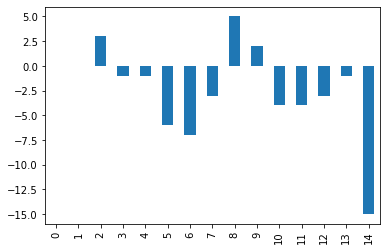

In [269]:
(nytpf['rank_last_week']-nytpf['rank']).plot.bar()

The last book on the best sellers rank list has a big change. Maybe it's the new book and has an excellent sell. We need to consider getting authorization from the author for this book.

<AxesSubplot:>

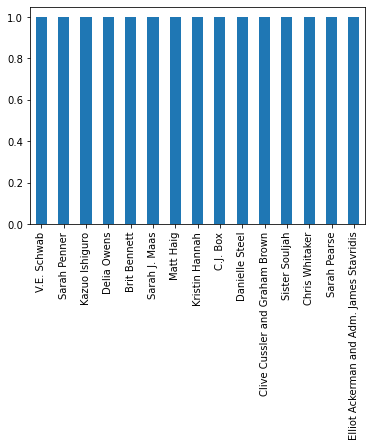

In [270]:
nytpf['author'].value_counts().plot.bar()

None of an author has two books in the best 15 sells ranking list. It fails for us to focus on one author. We need to pay attention to more authors.

Conclusion: For our book agent company, we need to pay attention to more authors and find the next best sell books. And we need to notice that we can't print too much paper for the book which is on the bestseller list for more than 15 weeks.